In [1]:
!pip install pyscbwrapper

In [2]:
%matplotlib inline

In [11]:
from pyscbwrapper import SCB
import pandas as pd
import json 
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')


scb = SCB('sv', 'BE', 'BE0101',
          'BE0101A','FolkmangdNov')


def get_lan():
    regioner = scb.get_variables()['region']
    r = re.compile(r'.* län')
    lan = list(filter(r.match, regioner))
    return lan

lan = get_lan()
scb.set_query(region=lan,
              tabellinnehåll=["Folkmängden den 1 november"])

scb_data = scb.get_data()
scb_uttag = scb_data['data']


koder = scb.get_query()['query'][0]['selection']['values']

landic = {}
for i in range(len(koder)):
  landic[koder[i]] = lan[i]

landata = {}

for kod in landic:
  landata[landic[kod]] = {}
  for i in range(len(scb_uttag)):
    if scb_uttag[i]['key'][0] == kod:
      landata[landic[kod]][scb_uttag[i]['key'][1]] = \
      float(scb_uttag[i]['values'][0])

df = pd.DataFrame(landata)
df = df.apply(lambda x: x/x.min(), axis=0)
df = df.apply(lambda x: x * 100, axis=0)

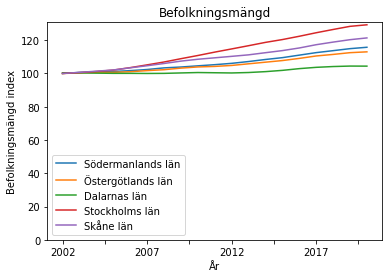

None

In [12]:
df = df.reset_index()
df = df.rename(columns={"index":"År"})
dfs = df.loc[:,['År', 'Södermanlands län','Östergötlands län', 'Dalarnas län', 'Stockholms län','Skåne län']]
ax = dfs.plot(x='År')
ax.set_ylim(ymin=0)
plt.title("Befolkningsmängd")
plt.xlabel("År")
plt.ylabel("Befolkningsmängd index")
display(plt.show())